In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from src.utils import get_layout, distribute, show_group, int2bin, bin2int, flatten, show_heatmap, hopcroft_karp, edge_coloring_bipartite
from src.QRMcode import QuantumReedMuller
from src.build_circuit import build_QRM_circuit
import numpy as np
import scipy as sp
import itertools
import networkx as nx




In [2]:
QRM = QuantumReedMuller(2, 2, 6)
#you can create a QRM using the standard QRM(rx, rz, m) notation

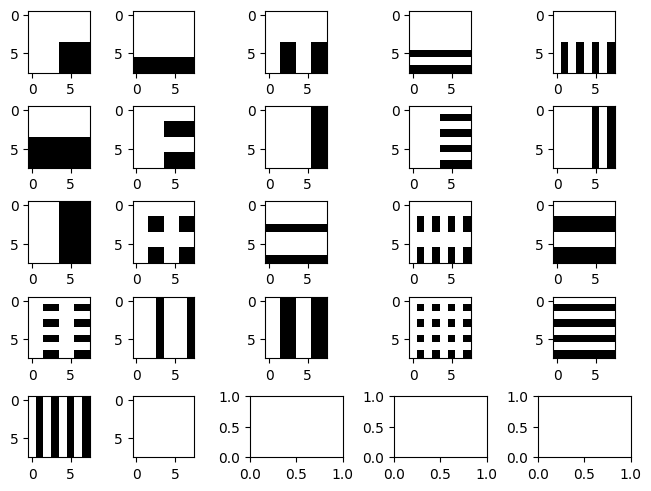

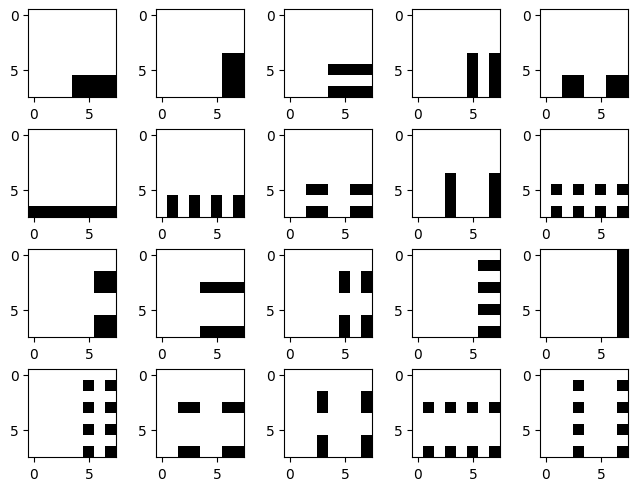

In [3]:
#Here I'm showing stab X and logical X
gauge=[]
for row in QRM.LX:
    A=distribute(row)
    gauge.append(A)
stab = []
for row in QRM.SX:
    stab.append(distribute(row))
show_group(stab, 5)
show_group(gauge, 5)


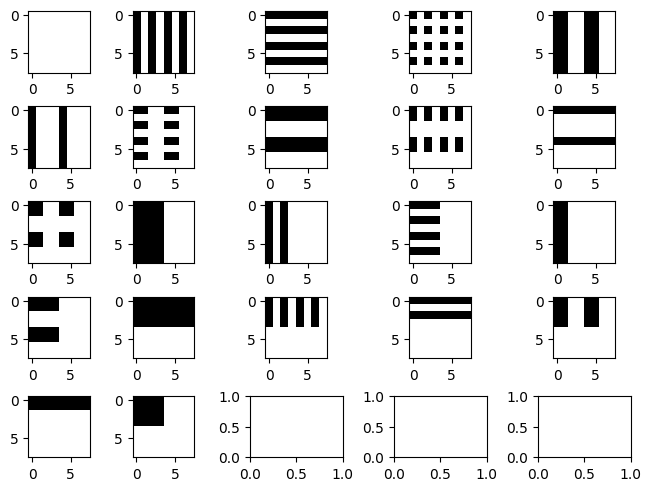

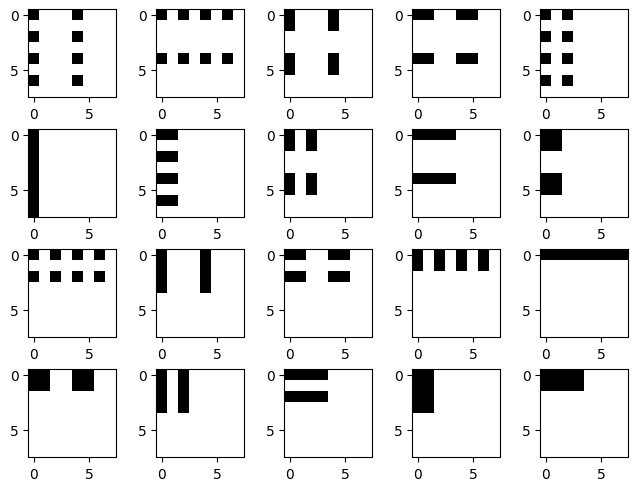

In [4]:
#Here I'm showing stab Z and logical Z
gauge=[]
for row in QRM.LZ:
    A=distribute(row)
    gauge.append(A)
stab = []
for row in QRM.SZ:
    stab.append(distribute(row))
show_group(stab, 5)
show_group(gauge, 5)

In [5]:
QRM = QuantumReedMuller(2,2,6)
polynomials = [[1,2,3], [3,4,5], [1,2,4], [3,4,6], [1,5,6], [2,5,6]]
#Using the function gauge_operators it's possible to gauge logical operators starting from polynomials
#The function automatically create a generator set to generate the new gauges and all the stabilizers
#the aggregate_method variable was needed to create the aggregate matrix but since I will doing it by it it's useless now (I will remoe it)
#the all and generators_size are variable needed to know how many gauges I will have at the end to measure in the circuit
#28 is the minimum (generator set) while 48 is the maximum (all shifts)
QRM.gauge_operators(polynomials, generators_size=28, all=True, aggregate_method="simple")

Gauging X logical
Removing complementary logicals
Creating group of gauge that spans stabilizer group + gauge group
Gauging Z logical
Removing complementary logicals
Creating group of gauge that spans stabilizer group + gauge group


In [6]:
#I was using this cell to try to find a way to measure all 48 gauges with depth 12
index = []
for row in np.transpose(np.concatenate((QRM.GSZ, QRM.GSX))):
    print(np.nonzero(row)[0])
    index.append(np.nonzero(row)[0])
#index = list(index)
#new_indexes = list(i+100 for i in np.zeros_like(index))
#for number in range(96):
#    positions = [100]*8
#    k = 0
#    print(number)
#    for i, row in enumerate(index):
#        for j, element in enumerate(row):
#            if number == element:
#                positions[k]=i
#                k+=1
#                break
#        if k==8:
#            break
#    for pos_perm in itertools.permutations(range(12), 8):
#        for row_perm in itertools.permutations(positions):
#            valid = True
#            for i, element in enumerate(pos_perm):
#                if new_indexes[row_perm[i]][element] != 100:
#                    valid = False
#                    break
#            if valid:
#                for i, element in enumerate(pos_perm):
#                    new_indexes[row_perm[i]][element] = number
#        if valid:
#            break

        


print(len(QRM.GSX))
print(np.linalg.matrix_rank(np.transpose(QRM.GSX).nonzero()))

[ 0  8 16 24 32 40 48 56 64 72 80 88]
[ 0  8 16 25 33 41 48 56 64 73 81 89]
[ 0  9 16 24 34 42 48 57 64 72 82 90]
[ 0  9 16 25 35 43 48 57 64 73 83 91]
[ 0 10 17 26 32 40 48 58 65 74 80 88]
[ 0 10 17 27 33 41 48 58 65 75 81 89]
[ 0 11 17 26 34 42 48 59 65 74 82 90]
[ 0 11 17 27 35 43 48 59 65 75 83 91]
[ 1 12 16 28 32 40 49 60 64 76 80 88]
[ 1 12 16 29 33 41 49 60 64 77 81 89]
[ 1 13 16 28 34 42 49 61 64 76 82 90]
[ 1 13 16 29 35 43 49 61 64 77 83 91]
[ 1 14 17 30 32 40 49 62 65 78 80 88]
[ 1 14 17 31 33 41 49 62 65 79 81 89]
[ 1 15 17 30 34 42 49 63 65 78 82 90]
[ 1 15 17 31 35 43 49 63 65 79 83 91]
[ 2  8 18 24 32 44 50 56 66 72 80 92]
[ 2  8 18 25 33 45 50 56 66 73 81 93]
[ 2  9 18 24 34 46 50 57 66 72 82 94]
[ 2  9 18 25 35 47 50 57 66 73 83 95]
[ 2 10 19 26 32 44 50 58 67 74 80 92]
[ 2 10 19 27 33 45 50 58 67 75 81 93]
[ 2 11 19 26 34 46 50 59 67 74 82 94]
[ 2 11 19 27 35 47 50 59 67 75 83 95]
[ 3 12 18 28 32 44 51 60 66 76 80 92]
[ 3 12 18 29 33 45 51 60 66 77 81 93]
[ 3 13 18 28

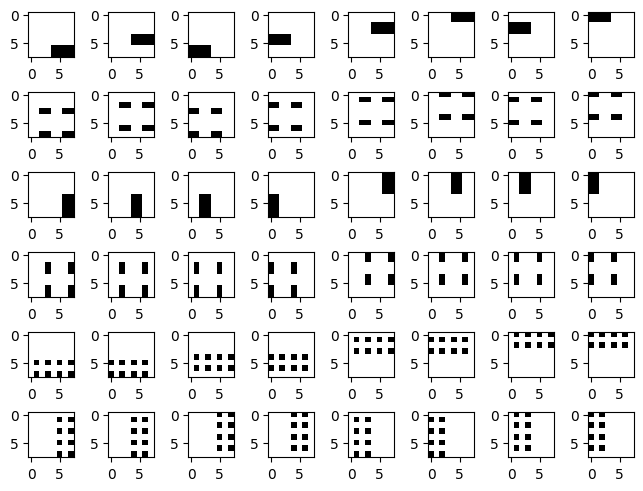

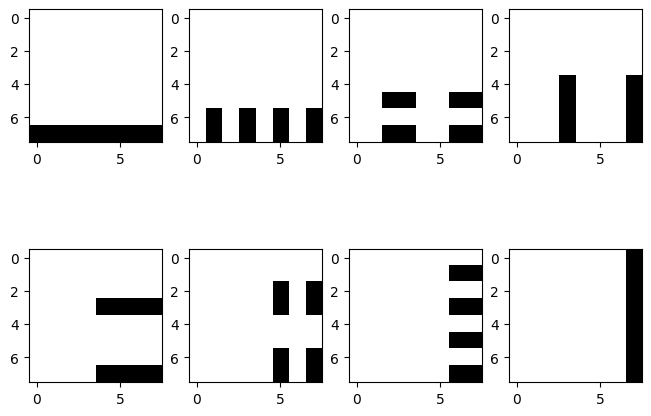

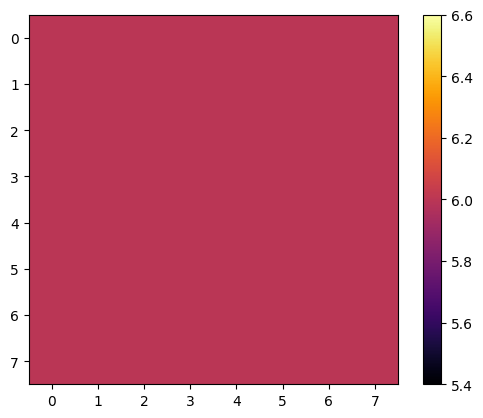

In [7]:
#This cell was use to show the gauge that will be measured (called GSX) and the result they generate once combined with the aggregate matrix

#aggregate = []
#for i, row in enumerate(QRM.aggregate_matrix_X):
#    aggregate_element = np.zeros_like(QRM.GSX[i])
#    for j, element in enumerate(row):
#        if element == 1:
#            aggregate_element = np.bitwise_xor(aggregate_element, QRM.GSX[j])
#    aggregate.append(distribute(list(aggregate_element)))
#    
#for i, row in enumerate(QRM.extra_aggregate_matrix_X):
#    aggregate_element = np.zeros_like(QRM.GSX[i])
#    for j, element in enumerate(row):
#        if element == 1:
#            aggregate_element = np.bitwise_xor(aggregate_element, QRM.GSX[j])
#    aggregate.append(distribute(list(aggregate_element)))

new_stabs=[]
new_logical=[]
for row in QRM.GSX:
    new_stabs.append(distribute(row))
for row in QRM.LX:
    new_logical.append(distribute(row))


show_group(new_stabs, 8)
show_group(new_logical, 4)
#show_group(aggregate, 10)
show_heatmap(new_stabs)
#show_heatmap(aggregate)

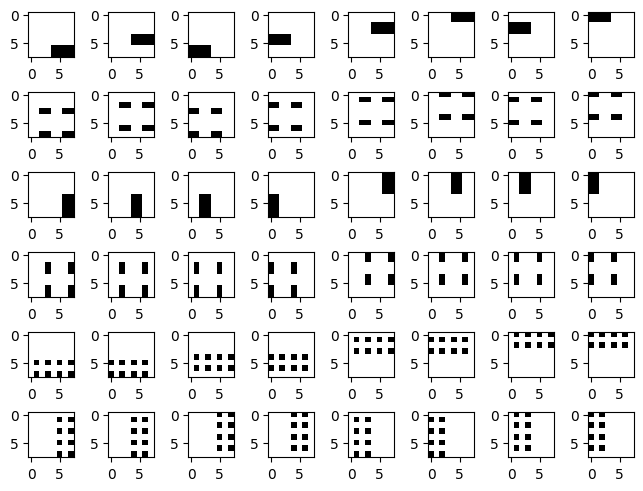

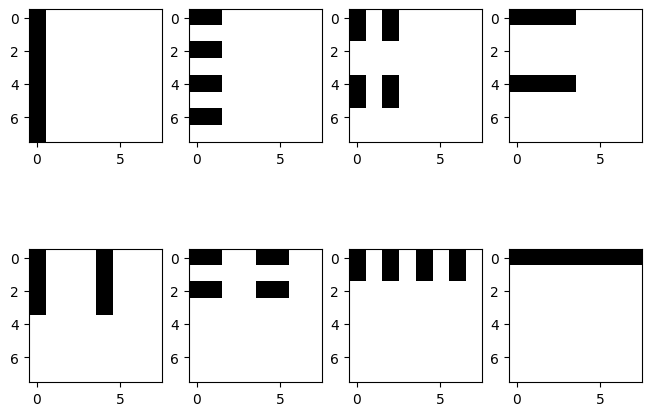

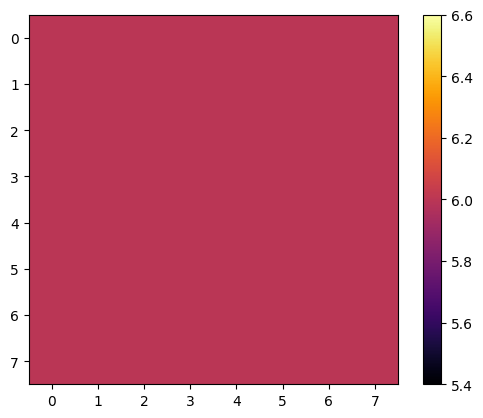

In [8]:
#This cell was use to show the gauge that will be measured (called GSZ) and the result they generate once combined with the aggregate matrix


#aggregate = []
#for i, row in enumerate(QRM.aggregate_matrix_Z):
#    aggregate_element = np.zeros_like(QRM.GSZ[i])
#    for j, element in enumerate(row):
#        if element == 1:
#            aggregate_element = np.bitwise_xor(aggregate_element, QRM.GSZ[j])
#    aggregate.append(distribute(list(aggregate_element)))
#    
#for i, row in enumerate(QRM.extra_aggregate_matrix_Z):
#    aggregate_element = np.zeros_like(QRM.GSZ[i])
#    for j, element in enumerate(row):
#        if element == 1:
#            aggregate_element = np.bitwise_xor(aggregate_element, QRM.GSZ[j])
#    aggregate.append(distribute(list(aggregate_element)))
#
#print(np.shape(QRM.aggregate_matrix_Z))
#print(np.shape(QRM.extra_aggregate_matrix_Z))

new_stabs=[]
new_logical=[]
for row in QRM.GSZ:
    new_stabs.append(distribute(row))
for row in QRM.LZ:
    new_logical.append(distribute(row))

show_group(new_stabs, 8)
show_group(new_logical, 4)
#show_group(aggregate, 10)
show_heatmap(new_stabs)
#show_heatmap(aggregate)

In [9]:
aggregate_matrix = [[1,0,0,0,0,0,1,  0,0,0,0,0,0,0,  0,0,0,0,0,0,0,  0,0,0,0,0,0,0],
                    [1,0,0,0,0,0,0,  1,0,0,0,0,0,0,  0,0,0,0,0,0,0,  0,0,0,0,0,0,0],
                    [0,0,1,0,0,0,0,  0,0,0,0,0,0,0,  0,0,0,0,1,0,0,  0,0,0,0,0,0,0],
                    [0,0,0,0,1,0,0,  0,0,0,0,0,0,0,  0,0,0,0,0,0,0,  0,0,1,0,0,0,0],
                    [0,0,0,0,1,0,0,  0,0,0,0,0,0,0,  0,0,0,0,0,0,0,  0,0,0,1,0,0,0],
                    [1,0,0,0,0,0,1,  1,1,0,0,0,0,0,  0,0,0,0,0,0,0,  0,0,0,0,0,0,0],
                    [1,0,0,0,0,0,0,  ]] #started manually but never finished, kept for comparsion

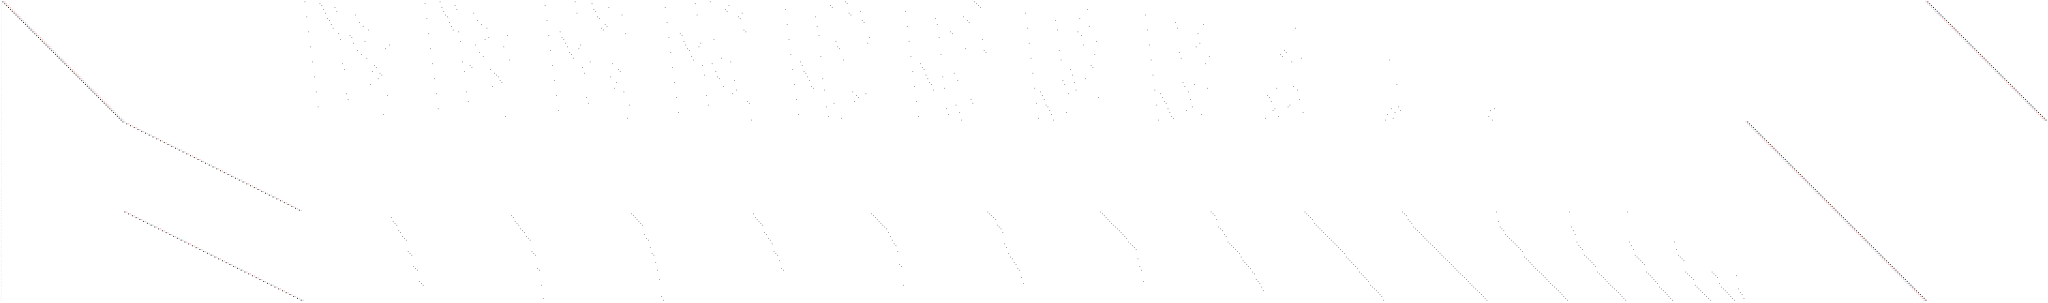

In [12]:
#The whole function build_QRM_circuit is a big mess since I was working on it before meeting you. Now it just create the CNOT pattern from the edge coloring
circuit = build_QRM_circuit(QRM, 0.001, 1)
circuit.diagram("timeline-svg")
#I can already see that the edge coloring is trying to pair first Z and then X stabilizers, maybe for this reason is not working
#eventhough it seems strange since i think the algorithm should work 

In [ ]:
print(get_layout(6))

dem = circuit.detector_error_model()

[[63 62 59 58 47 46 43 42]
 [61 60 57 56 45 44 41 40]
 [55 54 51 50 39 38 35 34]
 [53 52 49 48 37 36 33 32]
 [31 30 27 26 15 14 11 10]
 [29 28 25 24 13 12  9  8]
 [23 22 19 18  7  6  3  2]
 [21 20 17 16  5  4  1  0]]
